In [418]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import cv2 as cv
import numpy as np

def ObtainForegroundMask(image):
    
    
    
    sobel_x = cv.Sobel(cv.cvtColor(image, cv.COLOR_BGR2GRAY), cv.CV_64F, 1, 0, ksize=3)
    sobel_y = cv.Sobel(cv.cvtColor(image, cv.COLOR_BGR2GRAY), cv.CV_64F, 0, 1, ksize=3)
    sobel_filtered_image = np.sqrt(sobel_x**2 + sobel_y**2)
    
    

    _, binary_thresholded_image = cv.threshold(sobel_filtered_image.astype(np.uint8), 21, 1, cv.THRESH_BINARY)
    kernel = np.ones((5, 5), np.uint8)
    binary_thresholded_image = cv.dilate(binary_thresholded_image, kernel, iterations=1)
    binary_thresholded_image = cv.erode(binary_thresholded_image, kernel, iterations=3)
    return  binary_thresholded_image


image=cv.imread("C:\\Users\\Dell\\Desktop\\md_hw1\\data\\data\\im1.jpg")  
image2=cv.imread("C:\\Users\\Dell\\Desktop\\md_hw1\\data\\data\\im2.jpg")  
image3=cv.imread("C:\\Users\\Dell\\Desktop\\md_hw1\\data\\data\\im3.jpg")  




mask1=ObtainForegroundMask(image)
mask2=ObtainForegroundMask(image2)
mask3=ObtainForegroundMask(image3)
gold_mask = np.loadtxt("C:\\Users\\Dell\\Desktop\\md_hw1\\data\\data\\im1_gold_mask.txt")
gold_mask2=np.loadtxt("C:\\Users\\Dell\\Desktop\\md_hw1\\data\\data\\im2_gold_mask.txt")
gold_mask3=np.loadtxt("C:\\Users\\Dell\\Desktop\\md_hw1\\data\\data\\im3_gold_mask.txt")

print("Image1 results")

TP = np.sum(np.logical_and(mask1 == 1, gold_mask == 1))

TN = np.sum(np.logical_and(mask1 == 0, gold_mask == 0))

FP = np.sum(np.logical_and(mask1 == 1, gold_mask == 0))

FN = np.sum(np.logical_and(mask1 == 0, gold_mask == 1))

print("True Positives (TP):", TP)
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)

precision = TP / (TP + FP)

recall = TP / (TP + FN)


f1_score = 2 * (precision * recall) / (precision + recall)

print("precision: ",precision)
print("recall: ",recall)
print("f1 score: ",f1_score)

print("\nImage2 results")

TP = np.sum(np.logical_and(mask2 == 1, gold_mask2 == 1))

TN = np.sum(np.logical_and(mask2 == 0, gold_mask2 == 0))

FP = np.sum(np.logical_and(mask2 == 1, gold_mask2 == 0))

FN = np.sum(np.logical_and(mask2 == 0, gold_mask2 == 1))

print("True Positives (TP):", TP)
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)

precision = TP / (TP + FP)

recall = TP / (TP + FN)


f1_score = 2 * (precision * recall) / (precision + recall)

print("precision: ",precision)
print("recall: ",recall)
print("f1 score: ",f1_score)


print("\nImage3 results")

TP = np.sum(np.logical_and(mask3 == 1, gold_mask3 == 1))

TN = np.sum(np.logical_and(mask3 == 0, gold_mask3 == 0))

FP = np.sum(np.logical_and(mask3 == 1, gold_mask3 == 0))

FN = np.sum(np.logical_and(mask3 == 0, gold_mask3 == 1))

print("True Positives (TP):", TP)
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)

precision = TP / (TP + FP)

recall = TP / (TP + FN)


f1_score = 2 * (precision * recall) / (precision + recall)

print("precision: ",precision)
print("recall: ",recall)
print("f1 score: ",f1_score)



Image1 results
True Positives (TP): 226006
True Negatives (TN): 543846
False Positives (FP): 10565
False Negatives (FN): 6015
precision:  0.9553411026710797
recall:  0.9740756224652078
f1 score:  0.9646174070406665

Image2 results
True Positives (TP): 323427
True Negatives (TN): 442248
False Positives (FP): 8554
False Negatives (FN): 12203
precision:  0.9742334651681873
recall:  0.9636415099961266
f1 score:  0.9689085410516003

Image3 results
True Positives (TP): 468447
True Negatives (TN): 304152
False Positives (FP): 7813
False Negatives (FN): 6020
precision:  0.9835950951161131
recall:  0.987312078606099
f1 score:  0.9854500818847052


In [419]:
#visualisation of the masks on image
def visualize_mask(image, mask):
  
    mask_visualize = np.where(mask == 1, 255, 0).astype(np.uint8)

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(image)
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    axes[1].imshow(mask_visualize, cmap='gray')
    axes[1].set_title('Mask')
    axes[1].axis('off')

    plt.show()

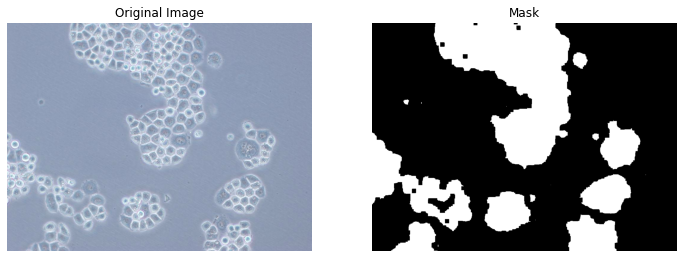

In [420]:
visualize_mask(image,mask1)

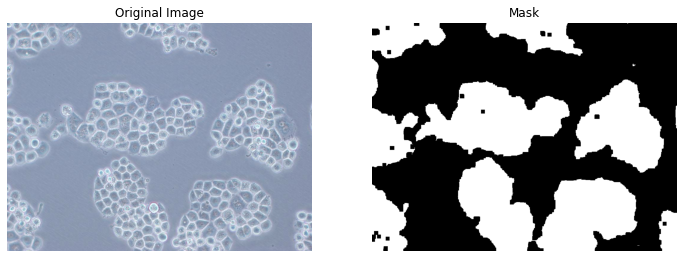

In [421]:
visualize_mask(image2,mask2)

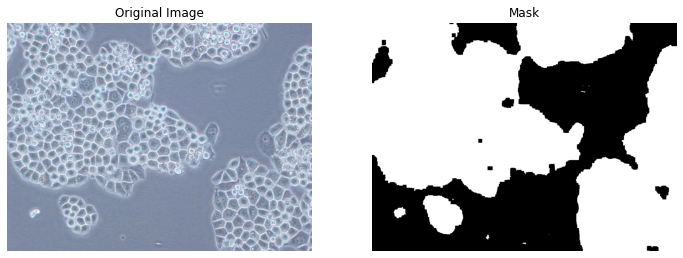

In [422]:
visualize_mask(image3,mask3)

In [24]:
################q2

Image 1
True Positives:  236
False Positives:  17
False Negatives:  6.0
Precision:  0.932806324110672
Recall:  0.9752066115702479
F1 Score:  0.9535353535353536

Image 2
True Positives:  302
False Positives:  32
False Negatives:  9.0
Precision:  0.9041916167664671
Recall:  0.9710610932475884
F1 Score:  0.9364341085271317

Image 3
True Positives:  439
False Positives:  43
False Negatives:  70.0
Precision:  0.9107883817427386
Recall:  0.862475442043222
F1 Score:  0.8859737638748738


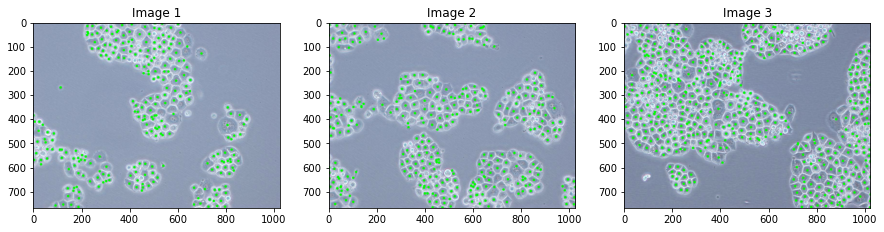

In [423]:
def FindCellLocations(image,mask):
    
    gray_image=cv.cvtColor(image,cv.COLOR_BGR2GRAY)
    blurred_gray_image=cv.GaussianBlur(gray_image,(5,5),0.03) 
    ret, thresh = cv.threshold(blurred_gray_image, 203, 255, cv.THRESH_BINARY)
    kernel = np.ones((1,1), np.uint8)
    dilated = cv.dilate(thresh, kernel, iterations=1)
    rgb_edge = cv.erode(dilated, kernel, iterations=3)
    not_edges = cv.bitwise_not(rgb_edge)
    masked_image = cv.bitwise_and(image, image, mask = mask)
    masked_image = cv.bitwise_and(masked_image, masked_image, mask = not_edges)
    gray = cv.cvtColor(masked_image, cv.COLOR_BGR2GRAY)
    gray = cv.convertScaleAbs(gray)
    dist_transform =  cv.distanceTransform(gray, cv.DIST_L2, 5)
    ret, cell_locations = cv.threshold(dist_transform, 0.21*dist_transform.max(), 255, cv.THRESH_BINARY)
    cell_locations = np.uint8(cell_locations)
    num_labels, labels, stats, centroids = cv.connectedComponentsWithStats(cell_locations)
    
    
    
    return centroids

def center_visual(image, centroids):
   
    img=image.copy()
    for centroid in centroids:
        center = tuple(map(int, centroid))
        cv.circle(img, center, 5, (0,255,0), -1)

    return img

def calculate_metrics(centroids, gold_cells):
    TP = 0
    FP = 0
    match = gold_cells.copy()
    
    for centroid in centroids[1:]:
        x, y = map(int, centroid)
        if gold_cells[y, x] > 0 and match[y, x] == gold_cells[y, x]:
            TP += 1
            match[y, x] = -1
        else:
            FP += 1

    FN = np.max(gold_cells) - TP
    precision = TP / (FP + TP)
    recall = TP / (FN + TP)
    fscore = 2 * precision * recall / (precision + recall)

    return TP, FP, FN, precision, recall, fscore

centr=FindCellLocations(image,mask1)
centr2=FindCellLocations(image2,mask2)
centr3=FindCellLocations(image3,mask3)

gold_cells = np.loadtxt("C:\\Users\\Dell\\Desktop\\md_hw1\\data\\data\\im1_gold_cells.txt")
gold_cells2 = np.loadtxt("C:\\Users\\Dell\\Desktop\\md_hw1\\data\\data\\im2_gold_cells.txt")
gold_cells3 = np.loadtxt("C:\\Users\\Dell\\Desktop\\md_hw1\\data\\data\\im3_gold_cells.txt")

TP, FP, FN, precision, recall, fscore = calculate_metrics(centr, gold_cells)
TP2, FP2, FN2, precision2, recall2, fscore2 = calculate_metrics(centr2, gold_cells2)
TP3, FP3, FN3, precision3, recall3, fscore3 = calculate_metrics(centr3, gold_cells3)

print("Image 1")
print("True Positives: ", TP)
print("False Positives: ", FP)
print("False Negatives: ", FN)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", fscore)

print("\nImage 2")
print("True Positives: ", TP2)
print("False Positives: ", FP2)
print("False Negatives: ", FN2)
print("Precision: ", precision2)
print("Recall: ", recall2)
print("F1 Score: ", fscore2)

print("\nImage 3")
print("True Positives: ", TP3)
print("False Positives: ", FP3)
print("False Negatives: ", FN3)
print("Precision: ", precision3)
print("Recall: ", recall3)
print("F1 Score: ", fscore3)

plt.figure(figsize=(15, 5))  
plt.subplot(1, 3, 1) 
plt.imshow(center_visual(image,centr))
plt.title('Image 1')

plt.subplot(1, 3, 2)
plt.imshow(center_visual(image2,centr2))
plt.title('Image 2')

plt.subplot(1, 3, 3)  
plt.imshow(center_visual(image3,centr3))
plt.title('Image 3')

plt.show()


In [26]:
######### question3

In [372]:
def check(next, mask, image, mark):
  if (next[0] >= image.shape[0]):
    return False
  if (next[1] >= image.shape[1]):
    return False
  if (mask[next] == 0):
    return False
  if (image[next] >= 160):
    return False
  if (mark[next] == 1):
    return False
  return True


def region_grow(image, mask, cell, index, arr, mark):
  from queue import Queue
  #cell = [(round(tup[0]), round(tup[1])) for tup in cell]
  cell = tuple(map(round, cell))
  cell = tuple(reversed(cell))
  
  mark[cell] = 1
  dirs = [[-1,0],[0,-1],[0,1],[1,0]]
  q = Queue()
  q.put((cell, 0))
  arr[cell] = index

  while not q.empty():
    first, depth = q.get()
    if depth == 100:
      continue
    for dir in dirs:
      next = (dir[0] + first[0], dir[1] + first[1])
      if (check(next, mask, image, mark)):
        mark[next] = 1
        q.put((next, depth+1))
        arr[next] = index

In [424]:
def FindCellBoundaries(image,mask,cells):
    
    mask[mask == 1] = 255
    image = cv.blur(image, (5,5))
    masked_image = cv.bitwise_and(image, image, mask = mask)
    r_image = masked_image[:,:,0]
    g_image = r_image
    kernel = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]], dtype=np.float32)
    log_image = cv.filter2D(g_image, cv.CV_32F, kernel)
    cv.normalize(log_image, log_image, 0, 255, cv.NORM_MINMAX)
    log_image = 255 - log_image
    log_image[log_image > 140] = 127
    log_image[log_image < 110] = 127
    cv.normalize(log_image, log_image, 0, 255, cv.NORM_MINMAX)
    log_image = cv.GaussianBlur(log_image, (5,5), 0)
    sharp = np.float32(g_image)
    res_image = sharp + log_image
    cv.normalize(res_image, res_image, 0, 255, cv.NORM_MINMAX)
    res_image = res_image.astype('uint8')
    arr = np.zeros(res_image.shape, 'uint16')
    mark = np.zeros(res_image.shape, 'uint8')
      
    for i, cell in enumerate(cells, start=1):
        
        region_grow(res_image, mask, cell, i, arr, mark)

    colored = np.zeros((res_image.shape[0], res_image.shape[1], 3), 'uint8')
    colors = np.random.randint(0,256,size=(len(cells), 3))
    for i in range(len(cells)):
        colored[arr == i+1] = colors[i,:]

    return arr, colored
  
  
  

In [425]:
cell_boundary, colored = FindCellBoundaries(image, mask1, centr)
cell_boundary2,colored2=FindCellBoundaries(image2,mask2,centr2)
cell_boundary3,colored3=FindCellBoundaries(image3,mask3,centr3)

In [435]:
def visualize_segmentation(image, segmented_cells, pred_segmented_cells):

    plt.figure(figsize=(16, 16))
    
   
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    
    
    plt.subplot(1, 3, 2)
    plt.imshow(segmented_cells, cmap='viridis')
    plt.title('Segmented Cells')
    plt.axis('off')
    
    plt.subplot(1,3,3)
    plt.imshow(pred_segmented_cells, cmap='viridis')
    plt.title('Prediction')
    plt.axis('off')
    
    
    plt.show()

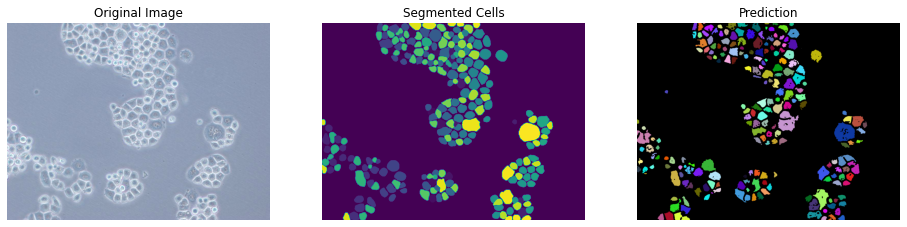

In [436]:
visualize_segmentation(image,gold_cells,colored)

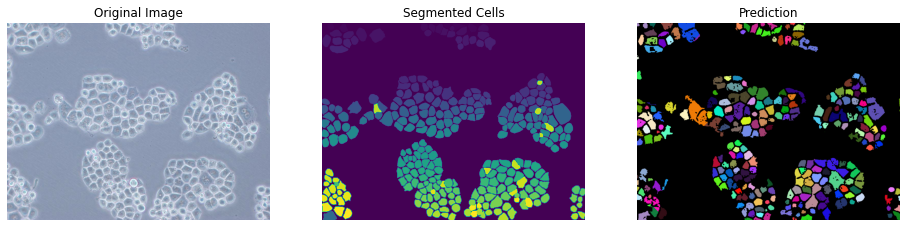

In [437]:
visualize_segmentation(image2,gold_cells2,colored2)

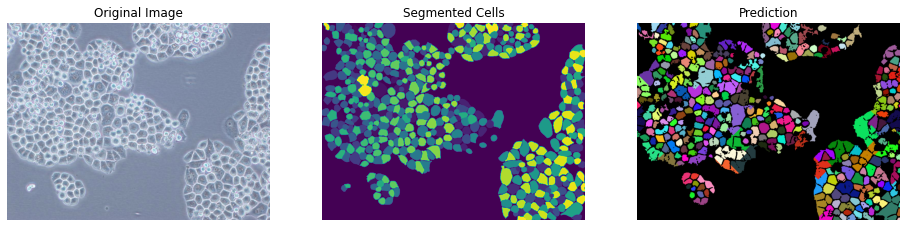

In [438]:
visualize_segmentation(image3,gold_cells3,colored3)

In [388]:
def calc_color_tp(ground_truth, found, ratio):
    tp_cnt = 0
    num_ground_truth = int(np.max(ground_truth))
    num_found = int(np.max(found))
    mark = np.zeros(num_ground_truth)
    for i in range(1, num_found + 1):
        marking = 0
        mx_marking = 0
        for j in range(1, num_ground_truth + 1):
            if mark[j - 1] == 1:
                continue
            cur_res = np.sum(np.logical_and(ground_truth == j, found == i))
            if mx_marking < cur_res:
                mx_marking = cur_res
                marking = j
        last_union = np.sum(np.logical_or(ground_truth == marking, found == i))
        if marking != 0 and mx_marking / last_union >= ratio:
            mark[marking - 1] = 1
            tp_cnt += 1
    return tp_cnt


def calc_color_fp(ground_truth, found, ratio):
    return np.max(found) - calc_color_tp(ground_truth, found, ratio)


def calc_color_fn(ground_truth, found, ratio):
    return np.max(ground_truth) - calc_color_tp(ground_truth, found, ratio)


def calc_color_recall(ground_truth, found, ratio):
    tp = calc_color_tp(ground_truth, found, ratio)
    return tp / np.max(found)


def calc_color_precision(ground_truth, found, ratio):
    tp = calc_color_tp(ground_truth, found, ratio)
    return tp / np.max(ground_truth)


def color_f_score(ground_truth, found, ratio):
    precision = calc_color_precision(ground_truth, found, ratio)
    recall = calc_color_recall(ground_truth, found, ratio)
    return 2 * precision * recall / (precision + recall)


def ratio(img, i):
    return np.sum(img == i) / np.sum(img != 0)

def maximal_overlap(src, dst, cur):
    maximal, index = 0, 0
    max_src = int(np.max(src))
    for i in range(1, max_src + 1):
        cur_sum = np.sum(np.logical_and(src == i, dst == cur))
        if maximal < cur_sum:
            maximal, index = cur_sum, i
    di = 2 * maximal / (np.sum(src == index) + np.sum(dst == cur))
   
    return index, di



def dice_index(ground_truth, found):
    res = 0
    whole_found = np.sum(found != 0)
    whole_ground = np.sum(ground_truth != 0)
    max_found = int(np.max(found))
    max_gt = int(np.max(ground_truth))
    for i in range(1, max_found + 1):
        grnd_i, di = maximal_overlap(ground_truth, found, i)
        res += di * (np.sum(found == i) / whole_found)
    for i in range(1, max_gt + 1):
        found_i, di = maximal_overlap(found, ground_truth, i)
        res += di * (np.sum(ground_truth == i) / whole_ground)
    return res / 2


In [439]:

for ratio in [0.5, 0.75, 0.9]:
    print("Image 1:")
    print("Ratio : ", ratio)
    print("precision :",calc_color_recall(gold_cells, cell_boundary, ratio))
    print("recall :",calc_color_precision(gold_cells, cell_boundary, ratio))
    print("fscore : ",color_f_score(gold_cells, cell_boundary, ratio))

print("dice index :",dice_index(gold_cells, cell_boundary))

for ratio in [0.5, 0.75, 0.9]:
    print("Image 2:")
    print("Ratio : ", ratio)
    print("precision :",calc_color_recall(gold_cells2, cell_boundary2, ratio))
    print("recall :",calc_color_precision(gold_cells2, cell_boundary2, ratio))
    print("fscore : ",color_f_score(gold_cells2, cell_boundary2, ratio))

print("dice index :",dice_index(gold_cells2, cell_boundary2))

for ratio in [0.5, 0.75, 0.9]:
    print("Image 3:")
    print("Ratio : ", ratio)
    print("precision :",calc_color_recall(gold_cells3, cell_boundary3, ratio))
    print("recall :",calc_color_precision(gold_cells3, cell_boundary3, ratio))
    print("fscore : ",color_f_score(gold_cells3, cell_boundary3, ratio))

print("dice index :",dice_index(gold_cells3, cell_boundary3))

Image 1:
Ratio :  0.5
precision : 0.5354330708661418
recall : 0.5619834710743802
fscore :  0.5483870967741936
Image 1:
Ratio :  0.75
precision : 0.14960629921259844
recall : 0.15702479338842976
fscore :  0.15322580645161293
Image 1:
Ratio :  0.9
precision : 0.007874015748031496
recall : 0.008264462809917356
fscore :  0.008064516129032258
dice index : 0.7229994852304977
Image 2:
Ratio :  0.5
precision : 0.4626865671641791
recall : 0.4983922829581994
fscore :  0.47987616099071206
Image 2:
Ratio :  0.75
precision : 0.21492537313432836
recall : 0.2315112540192926
fscore :  0.22291021671826622
Image 2:
Ratio :  0.9
precision : 0.005970149253731343
recall : 0.006430868167202572
fscore :  0.006191950464396284
dice index : 0.6790253694051392
Image 3:
Ratio :  0.5
precision : 0.4472049689440994
recall : 0.4243614931237721
fscore :  0.43548387096774194
Image 3:
Ratio :  0.75
precision : 0.14699792960662525
recall : 0.13948919449901767
fscore :  0.14314516129032256
Image 3:
Ratio :  0.9
precision

In [38]:
#####question 4

In [440]:
fundus1= cv.imread("C:\\Users\\Dell\\Desktop\\md_hw1\\fundus\\fundus\\d4_h.jpg")
fundus2=cv.imread("C:\\Users\\Dell\\Desktop\\md_hw1\\fundus\\fundus\\d7_dr.jpg")
fundus3= cv.imread("C:\\Users\\Dell\\Desktop\\md_hw1\\fundus\\fundus\\d11_g.jpg")
fgold1= cv.imread("C:\\Users\\Dell\\Desktop\\md_hw1\\fundus\\fundus\\d4_h_gold.png")
fgold2= cv.imread("C:\\Users\\Dell\\Desktop\\md_hw1\\fundus\\fundus\\d7_dr_gold.png")
fgold3= cv.imread("C:\\Users\\Dell\\Desktop\\md_hw1\\fundus\\fundus\\d11_g_gold.png")
fgold1= cv.cvtColor(fgold1, cv.COLOR_BGR2GRAY)
fgold1 = (fgold1 * 255).astype(np.uint8)
fgold2= cv.cvtColor(fgold2, cv.COLOR_BGR2GRAY)
fgold2 = (fgold2 * 255).astype(np.uint8)
fgold3= cv.cvtColor(fgold3, cv.COLOR_BGR2GRAY)
fgold3 = (fgold3 * 255).astype(np.uint8)

In [446]:
def FundusVessel(image):
    gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(1,1))
    enhanced_image = clahe.apply(gray_image)
    blurred_image = cv.GaussianBlur(enhanced_image, (7,7), 0)
   
    edges = cv.Canny(blurred_image, 0, 55) 
   
    kernel = np.ones((3,3), np.uint8)
    gradient = cv.morphologyEx(edges, cv.MORPH_GRADIENT, kernel)
    
  
    _, threshold = cv.threshold(gradient, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
    adaptive_threshold = cv.adaptiveThreshold(gradient, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2)
    threshold = cv.bitwise_and(threshold, adaptive_threshold)
 
    
    
    num_labels, labels, stats, centroids = cv.connectedComponentsWithStats(threshold)
    min_area = 0 
    out = np.zeros_like(threshold)
    for i in range(1, num_labels):
        if stats[i, cv.CC_STAT_AREA] >= min_area:
            out[labels == i] = 255
            
   
    out = cv.dilate(out, kernel, iterations=5)  
    out = cv.erode(out, kernel, iterations=6) 
    
    kernel = np.ones((5,5), np.uint8)
    out=cv.GaussianBlur(out,(5,5),0)
   
    out=cv.dilate(out,kernel,iterations=1)
    
    out=cv.GaussianBlur(out,(5,5),0)
    
    kernel = np.ones((3,3), np.uint8)
    out=cv.dilate(out,kernel,iterations=1)
    
    out=cv.GaussianBlur(out,(5,5),0)
   
    out = cv.medianBlur(out, 5)
    
    
    return out


In [447]:
def evaluate_segmentation(out, optimum):
    
    TP = np.sum((out == 255) & (optimum == 255))
    FP = np.sum((out == 255) & (optimum == 0))
    FN = np.sum((out == 0) & (optimum == 255))

    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    Fscore = 2 * (precision * recall) / (precision + recall)

    return precision, recall, Fscore

In [450]:
out1=FundusVessel(fundus1)
out2=FundusVessel(fundus2)
out3=FundusVessel(fundus3)


precision, recall, Fscore = evaluate_segmentation(out1, fgold1)
precision2, recall2, Fscore2 = evaluate_segmentation(out2, fgold2)
precision3, recall3, Fscore3 = evaluate_segmentation(out3, fgold3)

print("Image1")
print("precision:", precision)
print("recall:", recall)
print("F-score:", Fscore)

print("\nImage2")
print("precision:", precision2)
print("recall:", recall2)
print("F-score:", Fscore2)

print("\nImage3")
print("precision:", precision3)
print("recall:", recall3)
print("F-score:", Fscore3)

Image1
precision: 0.7376397065681977
recall: 0.7630225773862901
F-score: 0.750116473381299

Image2
precision: 0.656563748782282
recall: 0.7715644128779029
F-score: 0.709433840667662

Image3
precision: 0.8056731107732179
recall: 0.653393835574832
F-score: 0.7215869640323485


In [456]:
def visualize_segmentation(segmentation):
    # Create a visualization of the segmentation result
    visualization = cv.cvtColor(segmentation, cv.COLOR_GRAY2BGR)
    visualization = cv.merge([segmentation, segmentation, segmentation])
    
    # Convert vessel pixels to white
    visualization[segmentation == 255] = [255, 255, 255]

    return visualization


In [461]:
pred1=visualize_segmentation(out1)
pred2=visualize_segmentation(out2)
pred3=visualize_segmentation(out3)
gt1=visualize_segmentation(fgold1)
gt2=visualize_segmentation(fgold2)
gt3=visualize_segmentation(fgold3)

In [472]:
def vessel(image, pred_segmented_cells):

    plt.figure(figsize=(16,16))
    
   
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title('Original Image')
    plt.axis('off')
    
    
    plt.subplot(1, 2, 2)
    plt.imshow(pred_segmented_cells)
    plt.title('Vessel')
    plt.axis('off')

    
    plt.show()

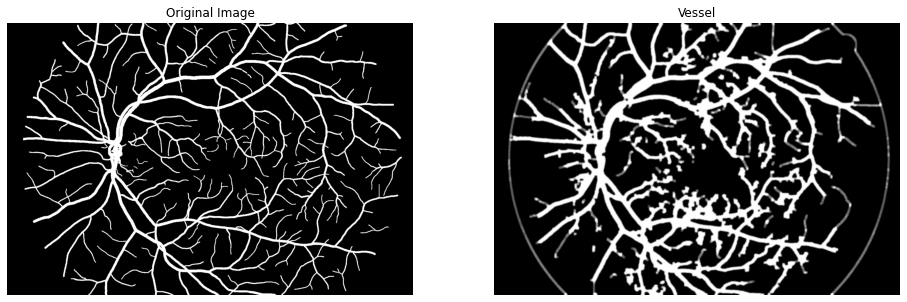

In [473]:
vessel(gt1,pred1)

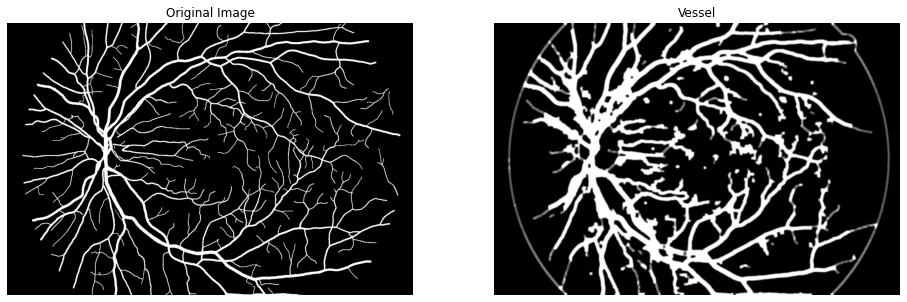

In [474]:
vessel(gt2,pred2)

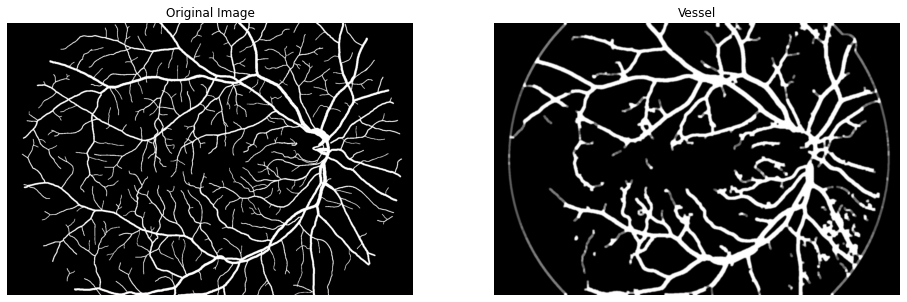

In [475]:
vessel(gt3,pred3)